In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris-flower-dataset/IRIS.csv


The dataset contains a set of 150 records under 5 attributes - Petal Length, Petal Width, Sepal Length, Sepal width and Class(Species).

## Workflow
1. Data Wranggling 
2. EDA
3. Applying appropriate machine learning model to solve the problem

In [2]:
##Loading essentials
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv("../input/iris-flower-dataset/IRIS.csv")
print(data.shape)
data.head()

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
##misiing value check
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
## cheching data format
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
print("No of duplicates in our dataset is" ,data.duplicated().sum())
data[data.duplicated()]

No of duplicates in our dataset is 3


,sepal_length,sepal_width,petal_length,petal_width,species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


Till now we have successfully loaded our dataset , and checked for missing values and incorrect data formats , data is aleardy free of them
<br>aslo there are three duplicated values but dropping them might lead to imbalanced dataset
<br>
Now we will move to data exploration part and will try to see how we can classify flower type based upon given features

In [7]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
data['species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: species, dtype: int64

Threre are eqaul no of records for each species , fully balanced data set.
<br>


Text(0.5, 1.0, 'petalLength vs petalWidth')

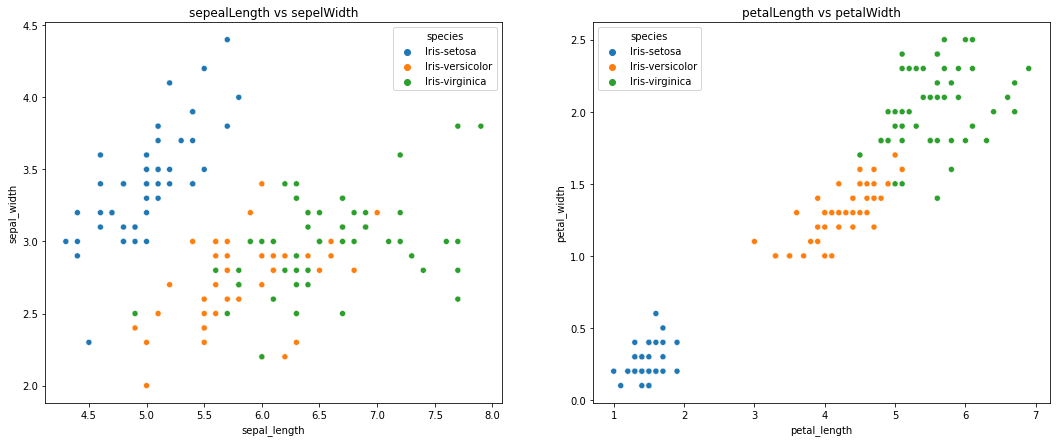

In [9]:
##let's see how two different columns helps us differentiating species
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
sns.scatterplot(ax=axs[0],x = "sepal_length",y ="sepal_width",hue='species',data=data)
axs[0].set_title("sepealLength vs sepelWidth")
sns.scatterplot(ax=axs[1],x = "petal_length",y ="petal_width",hue='species',data=data)
axs[1].set_title("petalLength vs petalWidth")


    1. From the above visualization, we can tell that the iris-setosa species has smaller sepal length but higher width. While we see Versicolor lies in almost middle for length as well as width. While Virginica has larger sepal lengths and smaller sepal widths.
   
    2. We see that setosa has the smallest petal length as well as petal widths, while Versicolor has average petal length and petal width while the virginica species has the highest petal length as well as petal width

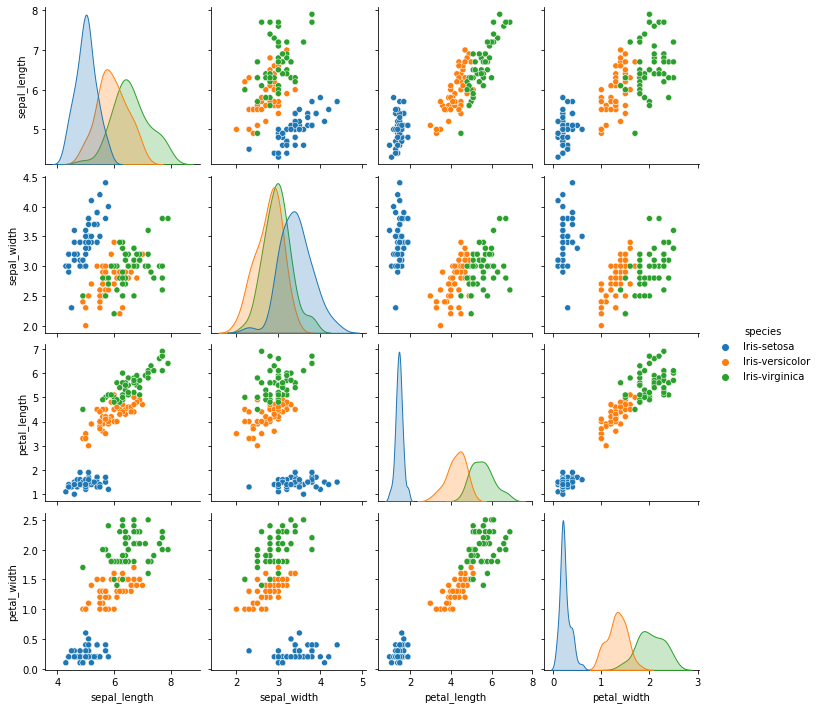

In [10]:
sns.pairplot(data,hue='species');
plt.grid(True)

    We can see that the setosa species has a large difference in its characteristics when compared to the other species, it has smaller petal width and length while its sepal width is high and its sepal length is low. Similar kind of conclusions can be drawn for the other species like the Versicolor species usually have average dimensions whether it is sepal or petal. While virginica has high pedal width and length while it has small sepal width but large sepal length.



let's explore correlation between features

<AxesSubplot:>

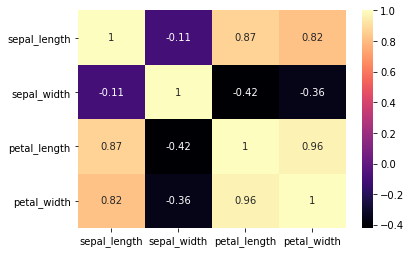

In [11]:
sns.heatmap(data.corr(),annot=True,cmap='magma')

    we see that petal_length and petal_width have a high correlation, petal_width and sepal_length have good correlation as well as petal_length and sepal_length have good correlations.
    
**Lets' dive into univariate analysis**

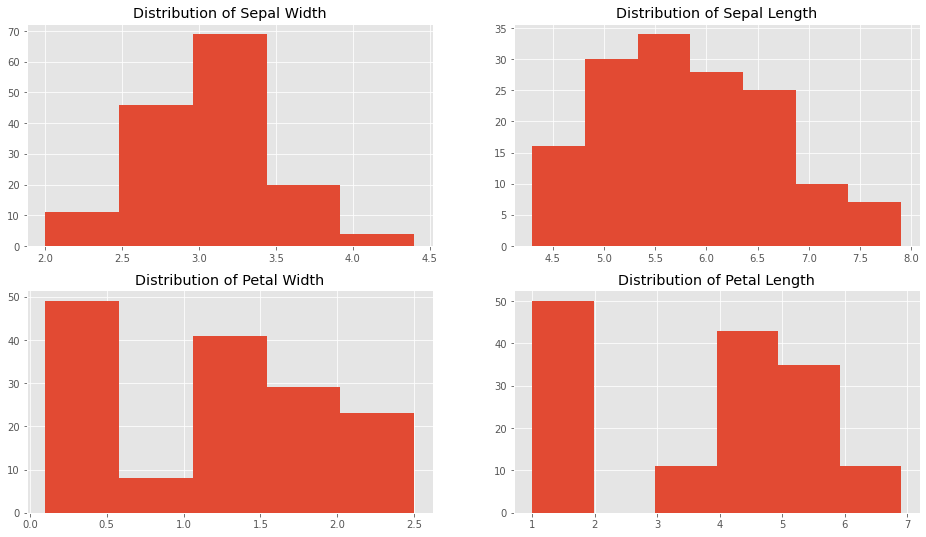

In [12]:
plt.style.use("ggplot")
fig, axes = plt.subplots(2, 2, figsize=(16,9))
axes[0,0].set_title("Distribution of Sepal Width")
axes[0,0].hist(data['sepal_width'], bins=5);
axes[0,1].set_title("Distribution of Sepal Length")
axes[0,1].hist(data['sepal_length'], bins=7);
axes[1,0].set_title("Distribution of Petal Width")
axes[1,0].hist(data['petal_width'], bins=5);
axes[1,1].set_title("Distribution of Petal Length")
axes[1,1].hist(data['petal_length'], bins=6);


    Distribution of Sepel Width is unimodal ,ranging between 4.4 to 7.9 ,with mean of nearly 3 and medial is somewhare between 3.3 to 3.5, maximum data fall between the range of 2.5 to 4
    
    Distribution of Sepel Length is unimodal ,ranging between 2.0 to 4.4 ,with mean of nearly 5.8 and medial is somewhare around 6, maximum data fall between the range of 5 to 7
    
    Distribution of petal Width is bimodal ,ranging between 0 to 2.5 ,with mean of nearly 1.2 and medial is somewhare around 1.4, maximum data fall between the range of 0.0 to 0.5 and between 1.0 to 1.5
    
    Distribution of petal Length is biimodal ,ranging between 1.0 to 6.9 ,with mean of nearly 4 and medial is somewhare between 4, maximum data fall between the range of 1 to 2 and 4 to 6

<AxesSubplot:xlabel='petal_length', ylabel='Count'>

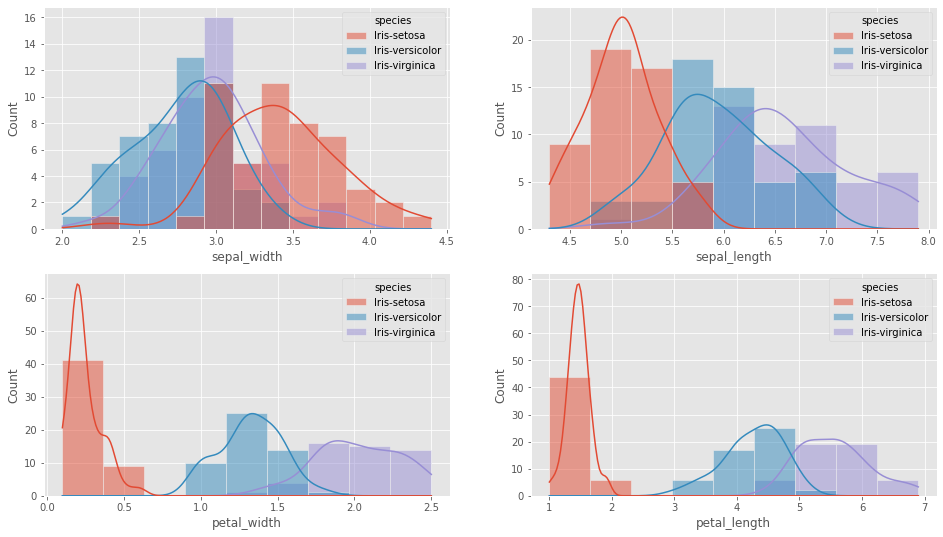

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
sns.histplot(ax = axes[0,0],data=data,x ='sepal_width',hue='species',kde=True)
sns.histplot(ax = axes[0,1],data=data,x ='sepal_length',hue='species',kde=True)
sns.histplot(ax = axes[1,0],data=data,x ='petal_width',hue='species',kde=True)
sns.histplot(ax = axes[1,1],data=data,x ='petal_length',hue='species',kde=True)

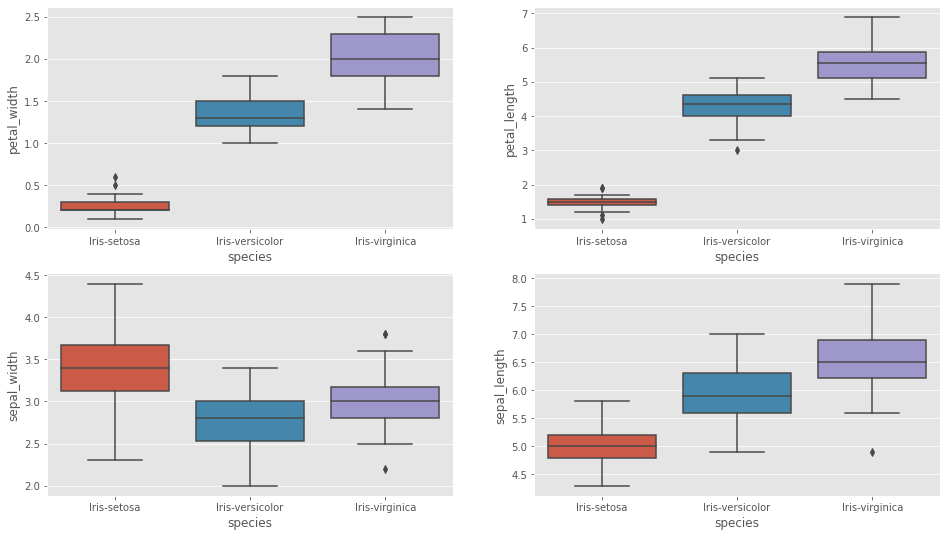

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
sns.boxplot(  y="petal_width", x= "species", data=data,  orient='v' , ax=axes[0, 0])
sns.boxplot(  y="petal_length", x= "species", data=data,  orient='v' , ax=axes[0, 1])
sns.boxplot(  y="sepal_width", x= "species", data=data,  orient='v' , ax=axes[1, 0])
sns.boxplot(  y="sepal_length", x= "species", data=data,  orient='v' , ax=axes[1, 1])
plt.show()

### Conclusion of EDA
1. The dataset is balanced i.e. equal records are present for all three species.
2. We have four numerical columns while just one categorical column which in turn is our target column.
3. A strong correlation is present between petal width and petal length.
4. The setosa species is the most easily distinguishable because of its small feature size.
5. The Versicolor and Virginica species are usually mixed and are sometimes hard to separate, while usually Versicolor has average feature sizes and virginica has larger feature sizes.
6. We do have some outliers and duplicates but we have just 150 recodrs and outliers are not putting a big impact so we are not going to wrangle them.


## Now let's fingure out model of best fit for data

Taking help from above <a href="https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html">sklearn guide</a> , we have labeled data to predict with less then 100k records so we will go with SVC classifier,


In [15]:
## split data perform one hot encoding and get ready for modeling
x = data.drop('species',axis=1)
y = data['species']
## perform ohe
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=.3)

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 


In [17]:
model  = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
model.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.1

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=2)

In [18]:
model.best_params_

{'C': 100, 'gamma': 0.01}

In [19]:
prediction = model.predict(x_test)

<AxesSubplot:>

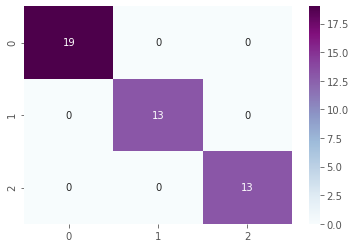

In [20]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test,prediction)
sns.heatmap(cf,annot=True,cmap='BuPu')

all set , model is working extreamly well , we have classified each and every class correctly.
<br>
**Thank you**
